In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

import multiprocessing
import xgboost as xgb

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [32]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


In [33]:
path = "/Users/rafa/Desktop/Project/Data/FM 2023.csv"
df_original = pd.read_csv(path)

In [34]:
df = df_original.copy()

In [35]:
""" df["Values"]
df = df.reindex(columns=['Name', 'Values', 'Age', 'Gender'])
df.head(10) """

' df["Values"]\ndf = df.reindex(columns=[\'Name\', \'Values\', \'Age\', \'Gender\'])\ndf.head(10) '

In [36]:
count = (df["Values"] >= 50000000).sum()
count

899

In [37]:
df.drop(df[df["Values"] >= 50000000].index, inplace=True)


In [38]:
df.drop(df[df["Values"] <= 50000].index, inplace=True)


In [39]:
df.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

In [40]:
df = pd.DataFrame(df)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df['Best_Position'] = df.apply(find_column_name, axis=1)


Cleaning

In [41]:
amr_df = df[(df["Best_Position"] == "AMC")]
amr_df = amr_df.reset_index(drop=True)
amr_df

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Marco Reus,AM RLC,33,159,170,Borussia Dortmund,15,13,13,16,16,16,6,15,7,6,15,15,9,16,15,15,12,16,15,14,15,18,13,13,18,10,14,15,14,12,14,8,12,13,13,9,17,4,17,19,16,1,2,1,2,2,1,2,1,3,3,2,9,16,9,18,17,17,10,10,1,1,1,1,1,1,1,13,8,10,20,20,15,15,180,71,14,20,33067483,91013383,AMC
1,Rafa,AM RLC,29,155,158,SL Benfica,11,11,16,11,15,11,5,12,5,6,14,12,9,15,13,13,11,10,11,15,12,13,19,10,17,7,9,11,18,18,15,5,16,17,13,6,12,6,15,7,10,1,3,2,2,2,1,2,2,2,1,3,8,7,10,14,12,14,9,14,1,1,1,1,1,1,1,14,12,12,20,20,18,14,172,62,11,20,29699999,55063493,AMC
2,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
3,Dejan Kulusevski,M/AM RC,22,153,171,Juventus,11,14,16,13,15,9,7,11,4,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,11,14,6,15,3,1,3,2,3,2,2,3,1,3,1,16,14,8,12,15,14,13,10,1,1,1,1,1,9,1,12,14,18,14,20,20,14,186,79,20,14,35000000,43295814,AMC
4,Nabil Fekir,AM/S RLC,29,153,158,Real Hispalis,15,13,16,15,16,15,6,14,4,5,16,13,5,17,10,13,12,15,13,16,15,16,16,16,14,8,12,12,15,16,16,5,12,15,14,17,12,12,16,10,13,2,1,2,2,1,3,3,3,4,3,2,10,15,9,13,12,14,9,10,1,1,1,1,1,1,1,1,12,1,16,20,16,17,173,72,20,6,43312502,29114975,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
702,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
703,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
704,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


Keep Attibutes


In [42]:
AMR_detailed_features = ['Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
        'diversity']

In [43]:
amr_df2 = amr_df[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()


In [44]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df2[AMR_detailed_features]
y = amr_df2["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 10)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [45]:
np.sort(fs.scores_)


array([1.57718781e-02, 2.23293095e-02, 2.43582477e-02, 7.57531765e-02,
       7.85460691e-02, 8.54299032e-02, 1.38466560e-01, 1.89918690e-01,
       2.40142451e-01, 2.59823142e-01, 2.76965565e-01, 3.03494037e-01,
       3.05676071e-01, 3.30849822e-01, 3.73471871e-01, 7.10600424e-01,
       7.35258500e-01, 7.67907226e-01, 8.37620243e-01, 8.90452709e-01,
       1.16419062e+00, 1.20100573e+00, 1.45812012e+00, 1.85149307e+00,
       2.24430539e+00, 2.32254044e+00, 2.48195661e+00, 3.11331181e+00,
       3.22245624e+00, 3.85015571e+00, 4.26609489e+00, 7.48505031e+00,
       7.93712621e+00, 8.40733607e+00, 1.82082540e+01, 1.97010975e+01])

In [46]:
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft

['Heading',
 'Decision',
 'Flair',
 'Leadership',
 'Work Rate',
 'Acceleration',
 'Balance',
 'Natural Fitness',
 'Pace',
 'Stability']

In [47]:
if 'Age' not in AMR_essential_ft:#
    AMR_essential_ft+=['Age']
if 'Values' not in AMR_essential_ft:#
    AMR_essential_ft+=['Values']
#if 'ca' not in AMR_essential_ft:#
    #AMR_essential_ft+=['ca']   

In [48]:

amr_df2 = amr_df.loc[:, AMR_essential_ft]

In [49]:

# Assuming df is your DataFrame
max_age = amr_df2['Age'].max()
amr_df2['reversed_age'] = max_age - amr_df2['Age']
amr_df2.drop(columns=['Age'], inplace=True)


Correlation

In [50]:
#looking for correlation
corr_matrix = amr_df2.corr()
corr_matrix

,Heading,Decision,Flair,Leadership,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,Values,reversed_age
Heading,1.000000,0.117321,-0.153703,0.206758,0.175219,-0.049728,0.211275,0.084492,0.001906,0.084621,-0.102569,-0.244661
Decision,0.117321,1.000000,0.081349,0.288186,0.151955,-0.133685,0.160051,-0.018795,-0.143691,0.149287,-0.077610,-0.395222
Flair,-0.153703,0.081349,1.000000,0.016321,-0.093280,0.082823,0.211269,-0.020094,0.029916,-0.099699,0.073751,-0.254540
Leadership,0.206758,0.288186,0.016321,1.000000,0.234823,-0.189024,0.256369,0.011811,-0.156971,0.164687,-0.105587,-0.450663
Work Rate,0.175219,0.151955,-0.093280,0.234823,1.000000,0.100510,0.266714,0.223697,0.069227,0.152406,0.059272,-0.242678
Acceleration,-0.049728,-0.133685,0.082823,-0.189024,0.100510,1.000000,0.020522,0.071057,0.700163,-0.065447,0.164993,0.056819
Balance,0.211275,0.160051,0.211269,0.256369,0.266714,0.020522,1.000000,0.163500,0.063596,0.031983,0.067502,-0.431063
Natural Fitness,0.084492,-0.018795,-0.020094,0.011811,0.223697,0.071057,0.163500,1.000000,0.095401,0.091106,0.066354,-0.073261
Pace,0.001906,-0.143691,0.029916,-0.156971,0.069227,0.700163,0.063596,0.095401,1.000000,-0.072591,0.158783,0.006569
Stability,0.084621,0.149287,-0.099699,0.164687,0.152406,-0.065447,0.031983,0.091106,-0.072591,1.000000,0.108634,-0.003586


Text(0.5, 1.0, 'Correlation Heatmap')

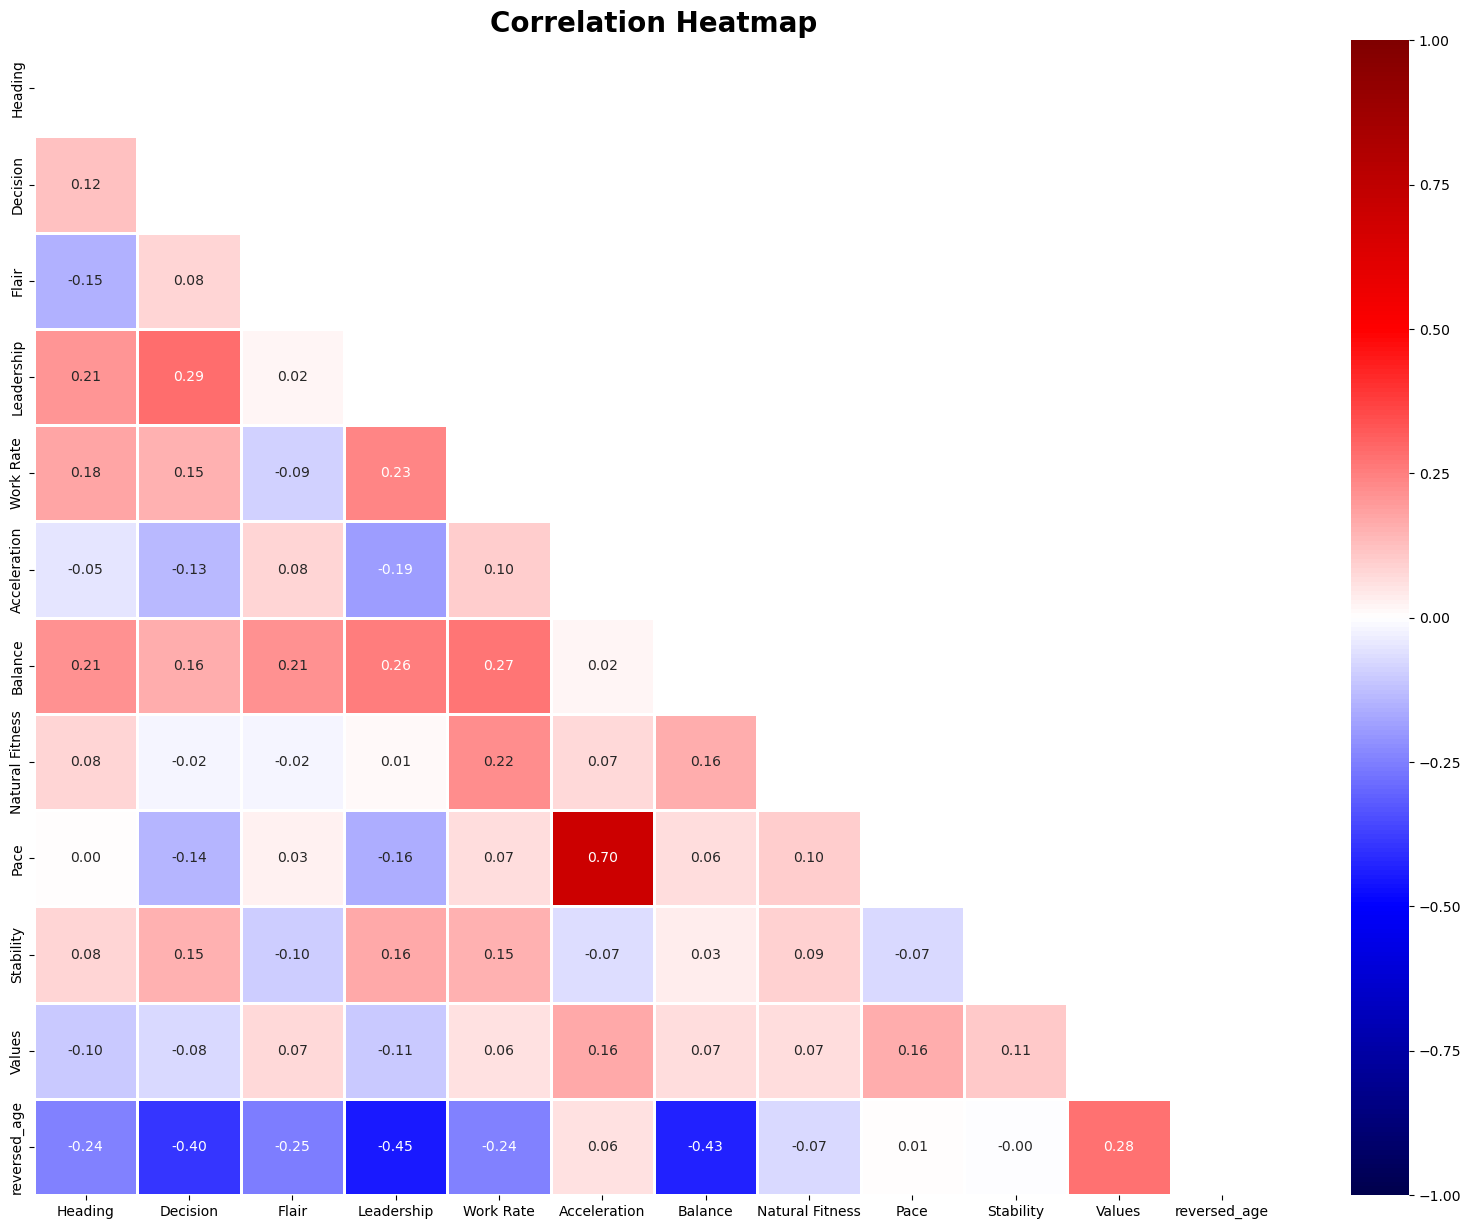

In [51]:

fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

Split

Feature Selection

In [52]:
X = amr_df2.copy()
values = X.pop("Values")
y = np.log10(values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Selection - Variance

In [53]:
range_var_df = (pd.DataFrame({
                'Range': X_train.max() - X_train.min(),
                'Variance': X_train.var()})
                .sort_values(by='Variance'))

In [54]:
range_var_df.head()

,Range,Variance
Pace,10,1.978040
Acceleration,11,2.300694
Decision,12,3.644067
Flair,12,4.096478
Work Rate,13,5.008135


In [55]:
range_var_df.tail()

,Range,Variance
Stability,15,5.694806
Heading,15,6.023380
Balance,15,6.480818
Leadership,17,10.233661
reversed_age,22,26.899749


In [56]:
""" from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import time

# Assuming you have X_train, y_train defined somewhere

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}
param_grid_knn = {
    "classifier__n_neighbors": list(range(3, 30)),
    "classifier__weights": ['uniform', 'distance'],
    "classifier__p": [1, 2]
}
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__epsilon": [0.1, 0.01, 0.001],
    "classifier__kernel": ["linear", "rbf", "poly"]
}

param_grid_dt = {
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}

param_grid_lr = {
    # Add linear regression parameters if needed
}

param_grid_gb = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

# List of classifiers and their corresponding parameter grids
classifiers = [
    SVR(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    GradientBoostingRegressor()
]

param_grids = [
    param_grid_svm,
    param_grid_rf,
    param_grid_knn,
    param_grid_dt,
    param_grid_lr,
    param_grid_gb
]

best_classifier = None
best_score = float('-inf')  # Initialize with a very low value

# Perform RandomizedSearchCV for each classifier
for classifier, param_grid in zip(classifiers, param_grids):
    start_time = time.time()

    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', classifier)
    ])

    search = RandomizedSearchCV(
        model_pipeline,
        param_grid,
        n_iter=50,
        cv=5,
        random_state=123,
        n_jobs=multiprocessing.cpu_count() - 1
    )
    search.fit(X_train, y_train)

    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_classifier = classifier.__class__.__name__

# Print the best classifier and its best score
print(f"Best Classifier: {best_classifier}")
print(f"Best Score: {best_score}")
 """

' from sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nfrom sklearn.model_selection import RandomizedSearchCV\nimport multiprocessing\nimport time\n\n# Assuming you have X_train, y_train defined somewhere\n\nparam_grid_rf = {\n    "classifier__n_estimators": [50, 100, 200],\n    "classifier__max_depth": [None, 10, 20],\n    "classifier__min_samples_split": [2, 5, 10]\n}\nparam_grid_knn = {\n    "classifier__n_neighbors": list(range(3, 30)),\n    "classifier__weights": [\'uniform\', \'distance\'],\n    "classifier__p": [1, 2]\n}\nparam_grid_svm = {\n    "classifier__C": [0.1, 1, 10],\n    "classifier__epsilon": [0.1, 0.01, 0.001],\n    "classifier__kernel": ["

ML

In [57]:
from xgboost import XGBRegressor

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {
    "xgbregressor__n_estimators": [100, 300, 500],
    "xgbregressor__max_depth": [3, 5, 7],
    "xgbregressor__learning_rate": [0.01, 0.1, 0.2],
    #"xgbregressor__subsample": [0.8, 0.9, 1.0],
    #"xgbregressor__colsample_bytree": [0.8, 0.9, 1.0],
    #"xgbregressor__gamma": [0, 0.1, 0.2],
    #"xgbregressor__min_child_weight": [1, 3, 5]
}


search = GridSearchCV(model_pipeline,
                          param_grid,
                          scoring="neg_mean_absolute_percentage_error",
                          cv=5,
                          n_jobs=-1)

search.fit(X_train, y_train)

best_score_search_xgb = search.best_score_

print(f"{best_score_search_xgb} MAPE")


-0.0599434371170394 MAPE


Metric

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [59]:
dt_predictions = search.predict(X_test)

In [60]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [61]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["svr"])

,MAE,RMSE,MAPE,R2
svr,0.40034,0.516253,0.062334,0.24806


In [62]:

# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value tree': 10**dt_predictions ,
                           'Actual Market Value': 10**y_test}).sort_values(by='Actual Market Value', ascending=False)

In [63]:
results_df.round(2)

,Predicted Market Value tree,Actual Market Value
521,4.231166e+06,48750001.0
24,1.620691e+07,44210250.0
78,6.030542e+06,41339997.0
522,1.037758e+07,39300000.0
2,1.968289e+07,36552285.0
...,...,...
211,4.058745e+05,129622.0
356,6.286487e+05,82015.0
235,2.652769e+05,79623.0
548,2.673080e+06,75598.0


In [64]:
results_df2 = results_df.merge(amr_df, how='left', left_index=True, right_index=True)


In [65]:
results_df2["Predicted Market Value tree"] = results_df2["Predicted Market Value tree"].round(2)
results_df2["Predicted Market Value tree"] = results_df2["Predicted Market Value tree"].round(2).astype(int)
results_df2


,Predicted Market Value tree,Actual Market Value,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
521,4231166,48750001.0,Mohamed Taabouni,M/AM LC,20,106,-75,Feyenoord Rotterdam,11,11,14,11,13,12,4,11,3,5,13,12,5,14,10,12,11,12,8,14,10,14,15,5,11,6,8,9,13,15,12,6,12,12,11,6,9,7,13,4,11,1,2,3,1,1,3,3,2,1,4,3,13,11,5,10,10,11,11,10,1,1,1,1,1,1,1,18,19,12,18,20,12,1,178,67,10,20,48750001,37065532,AMC
24,16206906,44210250.0,Nikola Vlašić,M/AM RLC,24,143,155,West Ham United,12,12,16,13,15,12,9,14,4,7,14,13,8,14,13,15,11,14,13,14,14,17,14,13,14,6,11,12,15,14,15,10,17,14,14,12,12,6,15,6,10,3,2,3,1,2,3,2,1,2,1,1,15,15,5,11,14,13,15,16,1,1,1,1,1,1,7,12,16,11,15,20,16,12,178,79,11,20,44210250,24039948,AMC
78,6030542,41339997.0,Orkun Kökçü,M/AM C,21,135,155,Feyenoord Rotterdam,13,12,13,11,14,15,7,13,12,6,14,14,6,14,10,12,14,14,14,13,13,14,13,15,13,7,13,14,12,14,13,7,13,13,15,11,13,10,12,12,16,1,2,1,2,3,2,3,3,1,3,1,18,16,6,11,12,13,13,11,1,1,1,1,1,1,12,12,20,12,10,20,10,7,175,0,13,20,41339997,37061602,AMC
522,10377581,39300000.0,Lovro Zvonarek,M/AM RLC,17,105,-8,FC Bayern München,12,10,12,11,13,12,6,11,4,9,12,11,11,13,12,11,12,12,10,13,10,13,13,13,12,11,12,12,12,12,11,8,14,12,12,8,12,7,12,6,15,3,2,1,1,2,2,1,1,1,2,1,12,16,4,12,15,16,13,12,1,1,1,1,1,1,10,12,18,12,15,20,15,11,180,68,9,20,39300000,2000097325,AMC
2,19682888,36552285.0,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,405874,129622.0,Rubens Sambueza,M/AM RLC,38,126,137,Club Atlético San Luis,14,15,15,12,16,16,8,15,11,6,15,17,7,17,15,11,12,12,13,16,13,12,16,14,13,10,12,14,11,11,13,8,11,10,10,12,14,13,14,11,14,3,2,1,3,1,1,2,1,2,1,1,14,16,14,13,16,12,8,6,1,1,1,1,1,1,1,13,18,12,15,20,15,1,174,74,20,8,129622,954205,AMC
356,628648,82015.0,Fabián Sambueza,AM RLC,33,121,135,Club Deportivo Popular Junior F.C. S.A.,13,12,13,12,14,13,6,12,8,6,14,11,5,14,11,12,11,12,13,14,13,13,14,10,14,11,13,12,12,12,13,5,11,12,11,10,12,5,12,7,11,2,3,3,1,1,1,3,2,2,3,2,12,12,11,11,12,11,12,11,1,1,1,1,1,1,1,1,12,1,15,20,18,1,170,65,12,20,82015,14042162,AMC
235,265276,79623.0,Nenê,M/AM/S RLC,41,125,157,VDG,13,12,14,13,14,14,11,14,6,5,14,18,5,16,10,12,11,14,14,16,15,15,15,13,14,7,12,13,9,10,11,10,15,10,11,11,12,9,13,7,14,3,3,3,1,3,3,3,2,2,3,3,15,16,14,10,14,13,8,8,1,1,1,1,1,1,1,17,15,15,18,20,15,16,181,70,20,7,79623,312059,AMC
548,2673080,75598.0,Libasse Ngom,AM/S C,18,101,-8,Guédiawaye Football Club,8,8,14,14,14,8,10,11,4,8,14,12,7,14,6,11,7,7,8,9,14,16,13,4,14,7,9,13,13,10,8,14,12,12,11,7,18,12,15,13,13,1,2,4,2,2,1,2,2,2,3,3,20,11,5,12,12,12,11,13,1,1,1,1,1,1,1,1,1,1,1,20,1,16,190,77,12,20,75598,2000152745,AMC


THE DAMN PREDICTION


In [66]:
df_predict_og = df_original.loc[df_original["Values"] > 50000000]
df_predict = df_predict_og

In [67]:
df_predict.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

/var/folders/dp/sb0zbjrn4y70c9_f08rwfmx00000gn/T/ipykernel_14683/1369094623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)


In [68]:
df_predict = pd.DataFrame(df_predict)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df_predict['Best_Position'] = df_predict.apply(find_column_name, axis=1)

In [69]:
amr_df_predict = df_predict[(df_predict["Best_Position"] == "AMC")]
amr_df_predict = amr_df_predict.reset_index(drop=True)
amr_df_predict.head(50)

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Kevin De Bruyne,M/AM RLC,31,189,189,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,15,6,15,7,14,1,3,1,3,3,3,3,3,3,2,1,13,17,13,14,11,18,16,13,1,1,1,1,1,1,12,15,20,15,14,20,14,12,181,68,16,20,347975206,18004457,AMC
1,Bernardo Silva,M/AM RC,27,176,180,Manchester City,14,15,17,15,17,13,10,13,2,12,17,13,8,18,13,16,15,16,15,17,15,16,17,12,17,13,16,20,15,19,16,7,17,14,17,9,16,10,16,6,13,2,2,1,3,2,1,1,1,2,2,2,15,17,14,11,13,17,12,8,1,1,1,1,1,1,1,12,20,16,12,20,19,9,173,64,20,8,347975206,55041632,AMC
2,Thomas Müller,AM RC,32,171,174,FC Bayern München,11,17,11,13,13,7,14,10,8,9,16,13,11,13,17,20,13,16,16,18,16,18,13,17,20,11,20,17,12,12,13,13,20,14,19,11,16,9,17,2,18,2,3,2,2,1,1,1,1,3,1,1,10,17,10,20,19,16,10,10,1,1,1,1,1,1,10,10,14,15,11,20,18,15,185,76,13,20,347975206,35011448,AMC
3,Kai Havertz,AM/S C,23,167,180,Chelsea,11,12,14,16,18,11,13,11,8,7,14,12,10,17,11,15,11,17,10,17,16,10,15,7,17,10,15,13,13,13,13,14,16,17,15,13,13,6,16,4,16,2,2,3,1,3,3,3,2,3,2,3,12,14,5,12,16,15,15,19,1,1,1,1,1,1,10,12,14,14,12,20,14,19,186,77,20,10,305612129,91151081,AMC
4,Jack Grealish,M/AM RLC,26,166,175,Manchester City,13,16,17,14,15,11,11,13,3,6,14,12,9,16,11,13,14,14,11,16,13,14,16,12,13,11,14,15,15,15,14,7,15,15,14,14,14,13,14,12,9,3,1,1,1,3,2,2,4,3,1,1,12,16,12,15,16,13,6,10,1,1,1,1,1,1,1,18,14,16,20,20,16,12,175,82,15,20,288514966,28067800,AMC
5,Bruno Fernandes,M/AM C,27,166,174,Manchester UFC,16,16,11,15,17,16,10,16,4,3,17,19,8,17,18,16,17,15,14,18,10,17,17,17,17,6,15,15,13,15,13,9,18,14,19,10,12,13,13,3,15,1,1,2,3,3,3,1,1,3,1,1,18,15,5,13,14,17,6,7,1,1,1,1,1,1,1,10,16,10,12,20,14,10,179,69,13,20,265261481,43124203,AMC
6,Mason Mount,AM RLC,23,165,170,Chelsea,14,12,11,14,15,14,9,12,5,7,15,15,11,15,14,14,15,15,12,12,16,18,13,12,17,14,18,20,15,13,10,9,15,15,20,11,12,6,14,8,12,1,3,2,2,1,3,4,3,2,3,3,16,18,6,13,14,16,16,17,1,1,1,1,1,1,14,1,15,1,16,20,15,1,178,70,12,20,126331239,28103590,AMC
7,Phil Foden,AM RLC,22,163,180,Manchester City,13,13,17,14,17,13,8,12,5,8,17,12,8,17,7,14,13,15,15,16,14,14,16,8,16,9,14,16,15,17,15,7,14,16,15,9,15,6,16,4,13,2,3,2,2,1,2,1,3,2,1,3,12,15,12,13,12,14,14,16,1,1,1,1,1,1,1,1,14,1,20,20,17,14,171,64,20,9,147976457,28108494,AMC
8,Martin Ødegaard,M/AM C,23,160,178,Arsenal,14,14,16,12,17,15,9,13,7,10,16,10,8,17,7,18,10,15,12,17,16,15,16,14,16,9,17,14,14,16,15,9,13,13,15,11,11,4,12,7,13,1,1,3,2,1,3,1,1,3,1,2,13,16,6,12,14,18,13,14,1,1,1,1,1,1,13,10,18,13,10,20,14,8,178,68,20,10,272952661,53095137,AMC
9,Pedri,M/AM RLC,19,159,176,Barcelona,9,14,17,11,18,9,7,11,6,6,17,11,9,17,11,17,11,16,15,18,16,14,18,9,13,9,13,15,14,15,13,8,16,13,16,9,15,5,13,5,15,1,1,2,1,2,3,2,2,4,2,3,12,14,3,14,13,15,15,17,1,1,1,1,1,1,1,12,20,14,15,20,16,5,174,65,10,20,96009385,67293495,AMC


In [70]:
amr_df2_predict = amr_df_predict[['ca','Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()

In [71]:
amr_df2_predict = amr_df2_predict.loc[:, AMR_essential_ft]

In [72]:
amrf_df__predict_values = amr_df2_predict.pop("Values")


In [73]:
max_age = amr_df2_predict['Age'].max()
amr_df2_predict['reversed_age'] = max_age - amr_df2_predict['Age']
amr_df2_predict.drop(columns=['Age'], inplace=True)

In [74]:
dt_predictions_50 = search.predict(amr_df2_predict)

In [75]:
dt_predictions_50=10**dt_predictions_50

In [76]:
len(dt_predictions_50)

94

In [77]:
amr_df_predict["Values Predicted"] = dt_predictions_50.round(2).astype(int)

In [88]:
to_show=amr_df_predict
to_show.head(10)

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position,Values Predicted
0,Kevin De Bruyne,M/AM RLC,31,189,189,Manchester City,14,19,15,16,16,17,6,17,7,9,18,16,9,18,12,14,13,15,15,20,18,17,16,13,14,11,14,15,15,13,14,10,16,14,17,13,15,6,15,7,14,1,3,1,3,3,3,3,3,3,2,1,13,17,13,14,11,18,16,13,1,1,1,1,1,1,12,15,20,15,14,20,14,12,181,68,16,20,347975206,18004457,AMC,8145536
1,Bernardo Silva,M/AM RC,27,176,180,Manchester City,14,15,17,15,17,13,10,13,2,12,17,13,8,18,13,16,15,16,15,17,15,16,17,12,17,13,16,20,15,19,16,7,17,14,17,9,16,10,16,6,13,2,2,1,3,2,1,1,1,2,2,2,15,17,14,11,13,17,12,8,1,1,1,1,1,1,1,12,20,16,12,20,19,9,173,64,20,8,347975206,55041632,AMC,42819572
2,Thomas Müller,AM RC,32,171,174,FC Bayern München,11,17,11,13,13,7,14,10,8,9,16,13,11,13,17,20,13,16,16,18,16,18,13,17,20,11,20,17,12,12,13,13,20,14,19,11,16,9,17,2,18,2,3,2,2,1,1,1,1,3,1,1,10,17,10,20,19,16,10,10,1,1,1,1,1,1,10,10,14,15,11,20,18,15,185,76,13,20,347975206,35011448,AMC,3344803
3,Kai Havertz,AM/S C,23,167,180,Chelsea,11,12,14,16,18,11,13,11,8,7,14,12,10,17,11,15,11,17,10,17,16,10,15,7,17,10,15,13,13,13,13,14,16,17,15,13,13,6,16,4,16,2,2,3,1,3,3,3,2,3,2,3,12,14,5,12,16,15,15,19,1,1,1,1,1,1,10,12,14,14,12,20,14,19,186,77,20,10,305612129,91151081,AMC,9232030
4,Jack Grealish,M/AM RLC,26,166,175,Manchester City,13,16,17,14,15,11,11,13,3,6,14,12,9,16,11,13,14,14,11,16,13,14,16,12,13,11,14,15,15,15,14,7,15,15,14,14,14,13,14,12,9,3,1,1,1,3,2,2,4,3,1,1,12,16,12,15,16,13,6,10,1,1,1,1,1,1,1,18,14,16,20,20,16,12,175,82,15,20,288514966,28067800,AMC,15484019
5,Bruno Fernandes,M/AM C,27,166,174,Manchester UFC,16,16,11,15,17,16,10,16,4,3,17,19,8,17,18,16,17,15,14,18,10,17,17,17,17,6,15,15,13,15,13,9,18,14,19,10,12,13,13,3,15,1,1,2,3,3,3,1,1,3,1,1,18,15,5,13,14,17,6,7,1,1,1,1,1,1,1,10,16,10,12,20,14,10,179,69,13,20,265261481,43124203,AMC,15732780
6,Mason Mount,AM RLC,23,165,170,Chelsea,14,12,11,14,15,14,9,12,5,7,15,15,11,15,14,14,15,15,12,12,16,18,13,12,17,14,18,20,15,13,10,9,15,15,20,11,12,6,14,8,12,1,3,2,2,1,3,4,3,2,3,3,16,18,6,13,14,16,16,17,1,1,1,1,1,1,14,1,15,1,16,20,15,1,178,70,12,20,126331239,28103590,AMC,8929725
7,Phil Foden,AM RLC,22,163,180,Manchester City,13,13,17,14,17,13,8,12,5,8,17,12,8,17,7,14,13,15,15,16,14,14,16,8,16,9,14,16,15,17,15,7,14,16,15,9,15,6,16,4,13,2,3,2,2,1,2,1,3,2,1,3,12,15,12,13,12,14,14,16,1,1,1,1,1,1,1,1,14,1,20,20,17,14,171,64,20,9,147976457,28108494,AMC,23619750
8,Martin Ødegaard,M/AM C,23,160,178,Arsenal,14,14,16,12,17,15,9,13,7,10,16,10,8,17,7,18,10,15,12,17,16,15,16,14,16,9,17,14,14,16,15,9,13,13,15,11,11,4,12,7,13,1,1,3,2,1,3,1,1,3,1,2,13,16,6,12,14,18,13,14,1,1,1,1,1,1,13,10,18,13,10,20,14,8,178,68,20,10,272952661,53095137,AMC,10626286
9,Pedri,M/AM RLC,19,159,176,Barcelona,9,14,17,11,18,9,7,11,6,6,17,11,9,17,11,17,11,16,15,18,16,14,18,9,13,9,13,15,14,15,13,8,16,13,16,9,15,5,13,5,15,1,1,2,1,2,3,2,2,4,2,3,12,14,3,14,13,15,15,17,1,1,1,1,1,1,1,12,20,14,15,20,16,5,174,65,10,20,96009385,67293495,AMC,36401844


In [89]:
to_show = to_show.reindex(columns=['Name', 'Values', 'Values Predicted',"Position"])
to_show


,Name,Values,Values Predicted,Position
0,Kevin De Bruyne,347975206,8145536,M/AM RLC
1,Bernardo Silva,347975206,42819572,M/AM RC
2,Thomas Müller,347975206,3344803,AM RC
3,Kai Havertz,305612129,9232030,AM/S C
4,Jack Grealish,288514966,15484019,M/AM RLC
5,Bruno Fernandes,265261481,15732780,M/AM C
6,Mason Mount,126331239,8929725,AM RLC
7,Phil Foden,147976457,23619750,AM RLC
8,Martin Ødegaard,272952661,10626286,M/AM C
9,Pedri,96009385,36401844,M/AM RLC


In [96]:
to_show[to_show['Values'] != 347975206].iloc[10:]


,Name,Values,Values Predicted,Position
15,Lorenzo Pellegrini,140095310,7781882,DM/M/AM C
16,Piotr Zieliński,50943751,3455597,M/AM C
17,Philippe Coutinho,52822636,1431982,M/AM LC
18,James Maddison,70175000,21436006,M/AM RLC
19,Dani Olmo,56430002,11629073,M/AM RLC
20,Iker Muniain,127050007,4669435,M/AM RLC
21,Nicolò Zaniolo,57585624,4734742,AM RC
22,Emile Smith Rowe,96746387,14864134,AM RLC
23,Lucas Paquetá,57424604,5173616,M/AM RC
24,Charles De Ketelaere,72036004,10293379,M/AM/S C


In [ ]:
amr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 706 non-null    object
 1   Position             706 non-null    object
 2   Age                  706 non-null    int64 
 3   ca                   706 non-null    int64 
 4   pa                   706 non-null    int64 
 5   Club                 706 non-null    object
 6   Corners              706 non-null    int64 
 7   Crossing             706 non-null    int64 
 8   Dribbling            706 non-null    int64 
 9   Finishing            706 non-null    int64 
 10  First Touch          706 non-null    int64 
 11  Free Kick Taking     706 non-null    int64 
 12  Heading              706 non-null    int64 
 13  Long Shots           706 non-null    int64 
 14  Long Throws          706 non-null    int64 
 15  Marking              706 non-null    int64 
 16  Passing 

In [ ]:
amr_df_predict.drop("Values",inplace=True, axis=1)

In [ ]:
amr_df_predict.rename(columns={"Values Predicted": "Values"}, inplace=True)


In [ ]:
amr_df_predict = pd.concat([amr_df, amr_df_predict], ignore_index=True)


In [ ]:
amr_df_predict

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Paulo Dybala,AM/S RC,28,160,177,Associazione Sportiva Roma,16,15,18,15,18,17,13,17,4,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,5,11,16,13,1,2,3,3,3,3,3,2,3,1,3,14,14,12,9,9,11,13,15,1,1,1,1,1,1,1,1,1,1,12,20,15,20,177,79,20,10,20000000,14044150,AMC
1,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
2,Dejan Kulusevski,M/AM RC,22,153,171,Juventus,11,14,16,13,15,9,7,11,4,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,11,14,6,15,3,1,3,2,3,2,2,3,1,3,1,16,14,8,12,15,14,13,10,1,1,1,1,1,9,1,12,14,18,14,20,20,14,186,79,20,14,35000000,43295814,AMC
3,Nabil Fekir,AM/S RLC,29,153,158,Real Hispalis,15,13,16,15,16,15,6,14,4,5,16,13,5,17,10,13,12,15,13,16,15,16,16,16,14,8,12,12,15,16,16,5,12,15,14,17,12,12,16,10,13,2,1,2,2,1,3,3,3,4,3,2,10,15,9,13,12,14,9,10,1,1,1,1,1,1,1,1,12,1,16,20,16,17,173,72,20,6,43312502,29114975,AMC
4,Pedro Gonçalves,M/AM RLC,24,153,161,Sporting Clube de Portugal,11,12,15,17,15,14,8,14,10,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,12,12,8,10,2,4,3,3,3,3,1,3,2,2,1,17,12,6,13,16,15,14,13,1,1,1,1,1,1,1,12,18,10,18,20,16,14,174,67,12,20,34748999,29192705,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,Iker Losada,M/AM C,20,110,-75,Vigo,7,6,14,14,14,9,10,8,7,10,12,4,10,11,10,14,7,9,10,14,14,5,10,8,13,11,10,11,14,14,10,9,10,14,9,8,14,5,15,8,18,3,1,4,1,1,1,1,3,1,3,1,8,12,5,11,12,9,10,17,1,1,1,1,1,1,1,1,16,1,1,20,1,14,175,70,5,20,6610486,67278254,AMC
795,Wu Xi,DM/M/AM C,33,106,113,Shanghai Shenhua,10,11,10,12,11,9,9,12,10,8,11,12,9,11,8,13,9,15,13,12,13,15,12,11,12,10,12,13,12,11,10,10,14,11,11,9,17,8,12,5,16,1,4,2,1,2,3,2,2,2,2,3,7,17,9,12,14,13,8,15,1,1,1,11,1,1,18,1,19,12,1,20,1,1,180,75,10,20,439198,23082336,AMC
796,Zhang Xizhe,M/AM LC,31,97,120,Beijing Guo'an,12,10,10,9,12,12,7,6,5,5,13,12,6,14,9,11,8,12,12,14,11,13,14,9,13,7,14,13,11,12,11,8,12,10,10,7,14,7,16,7,14,1,3,2,2,3,1,3,1,2,3,1,7,11,8,14,12,14,12,10,1,1,1,1,1,1,12,15,17,13,18,20,14,10,180,69,10,20,141316,23053137,AMC
797,Yin Hongbo,AM RLC,32,97,108,Meizhou Hakka,11,10,12,10,10,11,8,10,7,2,13,10,3,13,11,10,8,11,9,12,12,13,14,9,12,10,12,12,12,13,6,8,8,13,10,8,11,6,9,11,10,2,1,1,1,3,2,3,1,3,1,1,14,13,1,10,12,14,10,11,1,1,1,1,1,1,9,15,15,12,18,20,16,1,180,65,20,10,116392,23034722,AMC


In [ ]:
import pickle

with open('amr_df_predict.pickle', 'wb') as f:
    pickle.dump(amr_df_predict, f)
    